In [22]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [79]:
#Plot Confusion Matrix
#Evaluation was done by hand
folso_pred = ["Folsomia"] * 28 + ["not detected"] * 2 + ["Desoria"] * 8 + ["Species01"] * 3 + ["Sinella"]
folso = ["Folsomia"] * len(folso_pred)
sphae_pred = ["Sphaeridia"] * 34 + ["Deuterosminthurides"] * 15 + ["not detected"] * 2
sphae = ["Sphaeridia"] * len(sphae_pred)
pseudo_pred = ["Pseudosinella"] * 20
pseudo = ["Pseudosinella"] * len(pseudo_pred)
deutero_pred = ["Deuterosminthurides"] * 58 + ["not detected", "Folsomia", "Sminthurides", "Pseudosinella"]
deutero = ["Deuterosminthurides"] * len(deutero_pred)
desoria_pred = ["Desoria"] * 32 + ["Deuterosminthurides"]
desoria = ["Desoria"] * len(desoria_pred)
sinella_pred = ["Sinella"] * 13 + ["Folsomia"] * 2
sinella = ["Sinella"] * len(sinella_pred)
species01_pred = ["Species01"] * 42 + ["Folsomia"] * 9 + ["not detected"] * 6
species01 = ["Species01"] * len(species01_pred)
smint_pred = ["Sminthurides"] * 48 + ["Pseudosinella", "not detected"] + ["Deuterosminthurides"] * 2
smint = ["Sminthurides"] * len(smint_pred)
megalo_pred = ["Megalothorax"] * 14 + ["Sphaeridia"] * 3 + ["not detected"] * 5
megalo = ["Megalothorax"] * len(megalo_pred)
cerato_pred = ["Ceratophysella"] * 9
cerato = ["Ceratophysella"] * len(cerato_pred)
not_detected_pred = ["not detected"]
not_detected = ["not_detected"]
y = folso + sphae + pseudo + deutero + desoria + sinella + species01 + smint + megalo + cerato + not_detected
y_pred = folso_pred + sphae_pred + pseudo_pred + deutero_pred + desoria_pred + sinella_pred + species01_pred + smint_pred + megalo_pred + cerato_pred + not_detected_pred

In [80]:
colembo_labels=["Folsomia", "Sphaeridia", "Pseudosinella", "Deuterosminthurides", "Desoria", "Sinella", "Species01", "Sminthurides", "Megalothorax", "Ceratophysella", "not detected"]
cnf_matrix = confusion_matrix(y, y_pred, labels=colembo_labels)

In [81]:
#code from the scikit learn documentation https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.OrRd):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=6)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


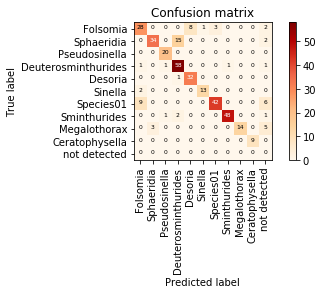

In [82]:
%matplotlib inline
plt.figure()
plot_confusion_matrix(cnf_matrix, colembo_labels)
plt.savefig('test.png', dpi=600)

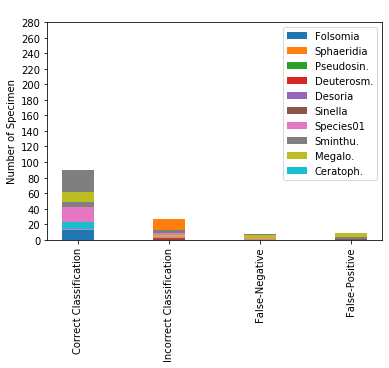

In [94]:
folso_ = (28, 12, 2, 2)
sphae_ = (34, 15, 2, 0)
pseudo_ = (20, 0, 0, 1)
deutero_ = (58, 3, 1, 2)
desoria_ = (32, 1, 0, 0)
sinella_ = (13, 2, 0, 2)
species01_ = (42, 9, 6, 1)
sminth_ = (48, 3, 1, 4)
megalo_ = (14, 3, 5, 4)
cerato_ = (9, 0, 0, 0)
N = 4
ind = np.arange(N)
width = 0.35

p1 = plt.bar(ind, folso_, width)
p2 = plt.bar(ind, sphae_, width, bottom=folso_)
p3 = plt.bar(ind, pseudo_, width, bottom=sphae_)
p4 = plt.bar(ind, deutero_, width, bottom=pseudo_)
p5 = plt.bar(ind, desoria_, width, bottom=deutero_)
p6 = plt.bar(ind, sinella_, width, bottom=desoria_)
p7 = plt.bar(ind, species01_, width, bottom=sinella_)
p8 = plt.bar(ind, sminth_, width, bottom=species01_)
p9 = plt.bar(ind, megalo_, width, bottom=sminth_)
p10 = plt.bar(ind, cerato_, width, bottom=megalo_)

plt.ylabel('Number of Specimen')
plt.title(' ')
plt.xticks(ind, ('Correct Classification', 'Incorrect Classification', 'False-Negative', 'False-Positive'), rotation=90)
plt.yticks(np.arange(0, 300, 20))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0], p10[0]), ('Folsomia', 'Sphaeridia', 'Pseudosin.', "Deuterosm.", "Desoria", "Sinella", "Species01", "Sminthu.", "Megalo.", "Ceratoph."))

plt.show()

In [3]:
#plot images with a grid
import cv2

img = cv2.imread("annotated_results/523")